## Colour Detection using DL

#### Imports:

In [4]:
pip install opencv-contrib-python


     ---------------------------------------- 45.3/45.3 MB 2.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os
import cv2
import shutil
from shutil import copyfile
import random

import keras
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator # from keras.preprocessing.image import ImageDataGenerator is deprecated
from sklearn.model_selection import train_test_split
from keras.utils import load_img, img_to_array
from tensorflow import keras
from keras.applications.vgg16 import VGG16
from keras.applications import ResNet50
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, MaxPooling2D, BatchNormalization, Activation, Dropout, Flatten, Conv2D, GlobalAveragePooling2D
from keras.models import Model
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

C:\Users\KIIT\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


#### Plot history:

In [2]:
# function to plote training history
def plot_history(history):
    # store results
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # plot results
    # accuracy
    plt.figure(figsize=(5, 8))
    plt.rcParams['figure.figsize'] = [8, 4]
    plt.rcParams['font.size'] = 10
    plt.rcParams['axes.grid'] = True
    plt.rcParams['figure.facecolor'] = 'white'
    plt.subplot(2, 1, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.ylabel('Accuracy')
    plt.title(f'\nTraining and Validation Accuracy. \nTrain Accuracy: {str(round(acc[-1],3))}\nValidation Accuracy: {str(round(val_acc[-1],3))}')
    
    print()

    # loss
    plt.subplot(2, 1, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.ylabel('Cross Entropy')
    plt.title(f'Training and Validation Loss. \nTrain Loss: {str(round(loss[-1],3))}\nValidation Loss: {str(round(val_loss[-1],3))}')
    plt.xlabel('epoch')
    plt.tight_layout(pad=3.0)
    plt.show()

#### Setting up the data:

In [3]:
datagen = ImageDataGenerator(rescale=1./255)   

In [5]:
train_generator = datagen.flow_from_directory(
    'C://Users//KIIT//OneDrive//Documents//Projects//color_detection_using_dl//training_dataset',
    target_size=(224, 224),
    batch_size=20,
    class_mode='categorical')

Found 250 images belonging to 10 classes.


In [6]:
test_generator = datagen.flow_from_directory(
    'C://Users//KIIT//OneDrive//Documents//Projects//color_detection_using_dl//training_dataset',
    target_size=(224, 224),
    batch_size=20,
    class_mode='categorical')

Found 250 images belonging to 10 classes.


#### Approach 1: ResNet15V2

In [7]:
ResNet_model = keras.applications.ResNet152V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))



234545216/234545216 [==============================] - 76s 0us/step


In [8]:
for layer in ResNet_model.layers[:-15]:       # Freezing all layers other than last 15 Layers
    layer.trainable = False

x = ResNet_model.output
x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
output  = Dense(units=10, activation='softmax')(x)
model = Model(ResNet_model.input, output)

In [9]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 114, 114, 64)         0         ['conv1_conv[0][0]']          
                                                                                              

 tchNormalization)                                                                                
                                                                                                  
 conv2_block3_preact_relu (  (None, 56, 56, 256)          0         ['conv2_block3_preact_bn[0][0]
 Activation)                                                        ']                            
                                                                                                  
 conv2_block3_1_conv (Conv2  (None, 56, 56, 64)           16384     ['conv2_block3_preact_relu[0][
 D)                                                                 0]']                          
                                                                                                  
 conv2_block3_1_bn (BatchNo  (None, 56, 56, 64)           256       ['conv2_block3_1_conv[0][0]'] 
 rmalization)                                                                                     
          

 conv3_block2_1_relu (Activ  (None, 28, 28, 128)          0         ['conv3_block2_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv3_block2_2_pad (ZeroPa  (None, 30, 30, 128)          0         ['conv3_block2_1_relu[0][0]'] 
 dding2D)                                                                                         
                                                                                                  
 conv3_block2_2_conv (Conv2  (None, 28, 28, 128)          147456    ['conv3_block2_2_pad[0][0]']  
 D)                                                                                               
                                                                                                  
 conv3_block2_2_bn (BatchNo  (None, 28, 28, 128)          512       ['conv3_block2_2_conv[0][0]'] 
 rmalizati

                                                                                                  
 conv3_block4_out (Add)      (None, 28, 28, 512)          0         ['conv3_block3_out[0][0]',    
                                                                     'conv3_block4_3_conv[0][0]'] 
                                                                                                  
 conv3_block5_preact_bn (Ba  (None, 28, 28, 512)          2048      ['conv3_block4_out[0][0]']    
 tchNormalization)                                                                                
                                                                                                  
 conv3_block5_preact_relu (  (None, 28, 28, 512)          0         ['conv3_block5_preact_bn[0][0]
 Activation)                                                        ']                            
                                                                                                  
 conv3_blo

 ation)                                                                                           
                                                                                                  
 conv3_block7_2_pad (ZeroPa  (None, 30, 30, 128)          0         ['conv3_block7_1_relu[0][0]'] 
 dding2D)                                                                                         
                                                                                                  
 conv3_block7_2_conv (Conv2  (None, 28, 28, 128)          147456    ['conv3_block7_2_pad[0][0]']  
 D)                                                                                               
                                                                                                  
 conv3_block7_2_bn (BatchNo  (None, 28, 28, 128)          512       ['conv3_block7_2_conv[0][0]'] 
 rmalization)                                                                                     
          

 conv4_block1_0_conv (Conv2  (None, 14, 14, 1024)         525312    ['conv4_block1_preact_relu[0][
 D)                                                                 0]']                          
                                                                                                  
 conv4_block1_3_conv (Conv2  (None, 14, 14, 1024)         263168    ['conv4_block1_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv4_block1_out (Add)      (None, 14, 14, 1024)         0         ['conv4_block1_0_conv[0][0]', 
                                                                     'conv4_block1_3_conv[0][0]'] 
                                                                                                  
 conv4_block2_preact_bn (Ba  (None, 14, 14, 1024)         4096      ['conv4_block1_out[0][0]']    
 tchNormal

                                                                                                  
 conv4_block4_1_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block4_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block4_1_relu (Activ  (None, 14, 14, 256)          0         ['conv4_block4_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block4_2_pad (ZeroPa  (None, 16, 16, 256)          0         ['conv4_block4_1_relu[0][0]'] 
 dding2D)                                                                                         
                                                                                                  
 conv4_blo

 ation)                                                                                           
                                                                                                  
 conv4_block6_3_conv (Conv2  (None, 14, 14, 1024)         263168    ['conv4_block6_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv4_block6_out (Add)      (None, 14, 14, 1024)         0         ['conv4_block5_out[0][0]',    
                                                                     'conv4_block6_3_conv[0][0]'] 
                                                                                                  
 conv4_block7_preact_bn (Ba  (None, 14, 14, 1024)         4096      ['conv4_block6_out[0][0]']    
 tchNormalization)                                                                                
          

 conv4_block9_1_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block9_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block9_1_relu (Activ  (None, 14, 14, 256)          0         ['conv4_block9_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block9_2_pad (ZeroPa  (None, 16, 16, 256)          0         ['conv4_block9_1_relu[0][0]'] 
 dding2D)                                                                                         
                                                                                                  
 conv4_block9_2_conv (Conv2  (None, 14, 14, 256)          589824    ['conv4_block9_2_pad[0][0]']  
 D)       

                                                                                                  
 conv4_block11_3_conv (Conv  (None, 14, 14, 1024)         263168    ['conv4_block11_2_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block11_out (Add)     (None, 14, 14, 1024)         0         ['conv4_block10_out[0][0]',   
                                                                     'conv4_block11_3_conv[0][0]']
                                                                                                  
 conv4_block12_preact_bn (B  (None, 14, 14, 1024)         4096      ['conv4_block11_out[0][0]']   
 atchNormalization)                                                                               
                                                                                                  
 conv4_blo

 ormalization)                                                                                    
                                                                                                  
 conv4_block14_1_relu (Acti  (None, 14, 14, 256)          0         ['conv4_block14_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block14_2_pad (ZeroP  (None, 16, 16, 256)          0         ['conv4_block14_1_relu[0][0]']
 adding2D)                                                                                        
                                                                                                  
 conv4_block14_2_conv (Conv  (None, 14, 14, 256)          589824    ['conv4_block14_2_pad[0][0]'] 
 2D)                                                                                              
          

 conv4_block16_3_conv (Conv  (None, 14, 14, 1024)         263168    ['conv4_block16_2_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block16_out (Add)     (None, 14, 14, 1024)         0         ['conv4_block15_out[0][0]',   
                                                                     'conv4_block16_3_conv[0][0]']
                                                                                                  
 conv4_block17_preact_bn (B  (None, 14, 14, 1024)         4096      ['conv4_block16_out[0][0]']   
 atchNormalization)                                                                               
                                                                                                  
 conv4_block17_preact_relu   (None, 14, 14, 1024)         0         ['conv4_block17_preact_bn[0][0
 (Activati

                                                                                                  
 conv4_block19_1_relu (Acti  (None, 14, 14, 256)          0         ['conv4_block19_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block19_2_pad (ZeroP  (None, 16, 16, 256)          0         ['conv4_block19_1_relu[0][0]']
 adding2D)                                                                                        
                                                                                                  
 conv4_block19_2_conv (Conv  (None, 14, 14, 256)          589824    ['conv4_block19_2_pad[0][0]'] 
 2D)                                                                                              
                                                                                                  
 conv4_blo

 2D)                                                                                              
                                                                                                  
 conv4_block21_out (Add)     (None, 14, 14, 1024)         0         ['conv4_block20_out[0][0]',   
                                                                     'conv4_block21_3_conv[0][0]']
                                                                                                  
 conv4_block22_preact_bn (B  (None, 14, 14, 1024)         4096      ['conv4_block21_out[0][0]']   
 atchNormalization)                                                                               
                                                                                                  
 conv4_block22_preact_relu   (None, 14, 14, 1024)         0         ['conv4_block22_preact_bn[0][0
 (Activation)                                                       ]']                           
          

 conv4_block24_1_relu (Acti  (None, 14, 14, 256)          0         ['conv4_block24_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block24_2_pad (ZeroP  (None, 16, 16, 256)          0         ['conv4_block24_1_relu[0][0]']
 adding2D)                                                                                        
                                                                                                  
 conv4_block24_2_conv (Conv  (None, 14, 14, 256)          589824    ['conv4_block24_2_pad[0][0]'] 
 2D)                                                                                              
                                                                                                  
 conv4_block24_2_bn (BatchN  (None, 14, 14, 256)          1024      ['conv4_block24_2_conv[0][0]']
 ormalizat

                                                                                                  
 conv4_block26_out (Add)     (None, 14, 14, 1024)         0         ['conv4_block25_out[0][0]',   
                                                                     'conv4_block26_3_conv[0][0]']
                                                                                                  
 conv4_block27_preact_bn (B  (None, 14, 14, 1024)         4096      ['conv4_block26_out[0][0]']   
 atchNormalization)                                                                               
                                                                                                  
 conv4_block27_preact_relu   (None, 14, 14, 1024)         0         ['conv4_block27_preact_bn[0][0
 (Activation)                                                       ]']                           
                                                                                                  
 conv4_blo

 vation)                                                                                          
                                                                                                  
 conv4_block29_2_pad (ZeroP  (None, 16, 16, 256)          0         ['conv4_block29_1_relu[0][0]']
 adding2D)                                                                                        
                                                                                                  
 conv4_block29_2_conv (Conv  (None, 14, 14, 256)          589824    ['conv4_block29_2_pad[0][0]'] 
 2D)                                                                                              
                                                                                                  
 conv4_block29_2_bn (BatchN  (None, 14, 14, 256)          1024      ['conv4_block29_2_conv[0][0]']
 ormalization)                                                                                    
          

 conv4_block31_out (Add)     (None, 14, 14, 1024)         0         ['conv4_block30_out[0][0]',   
                                                                     'conv4_block31_3_conv[0][0]']
                                                                                                  
 conv4_block32_preact_bn (B  (None, 14, 14, 1024)         4096      ['conv4_block31_out[0][0]']   
 atchNormalization)                                                                               
                                                                                                  
 conv4_block32_preact_relu   (None, 14, 14, 1024)         0         ['conv4_block32_preact_bn[0][0
 (Activation)                                                       ]']                           
                                                                                                  
 conv4_block32_1_conv (Conv  (None, 14, 14, 256)          262144    ['conv4_block32_preact_relu[0]
 2D)      

                                                                                                  
 conv4_block34_2_pad (ZeroP  (None, 16, 16, 256)          0         ['conv4_block34_1_relu[0][0]']
 adding2D)                                                                                        
                                                                                                  
 conv4_block34_2_conv (Conv  (None, 14, 14, 256)          589824    ['conv4_block34_2_pad[0][0]'] 
 2D)                                                                                              
                                                                                                  
 conv4_block34_2_bn (BatchN  (None, 14, 14, 256)          1024      ['conv4_block34_2_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_blo

 2D)                                                                                              
                                                                                                  
 conv4_block36_out (Add)     (None, 7, 7, 1024)           0         ['max_pooling2d_2[0][0]',     
                                                                     'conv4_block36_3_conv[0][0]']
                                                                                                  
 conv5_block1_preact_bn (Ba  (None, 7, 7, 1024)           4096      ['conv4_block36_out[0][0]']   
 tchNormalization)                                                                                
                                                                                                  
 conv5_block1_preact_relu (  (None, 7, 7, 1024)           0         ['conv5_block1_preact_bn[0][0]
 Activation)                                                        ']                            
          

 conv5_block3_1_bn (BatchNo  (None, 7, 7, 512)            2048      ['conv5_block3_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_block3_1_relu (Activ  (None, 7, 7, 512)            0         ['conv5_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv5_block3_2_pad (ZeroPa  (None, 9, 9, 512)            0         ['conv5_block3_1_relu[0][0]'] 
 dding2D)                                                                                         
                                                                                                  
 conv5_block3_2_conv (Conv2  (None, 7, 7, 512)            2359296   ['conv5_block3_2_pad[0][0]']  
 D)       

In [10]:
loss = keras.losses.CategoricalCrossentropy()
optimizer = keras.optimizers.legacy.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss=loss, metrics= ['accuracy'])

In [11]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=test_generator.n//test_generator.batch_size

In [12]:
STEP_SIZE_TRAIN

12

In [13]:
STEP_SIZE_VALID

12

In [14]:
history = model.fit_generator(generator=train_generator,
                            steps_per_epoch=STEP_SIZE_TRAIN,
                            validation_data=test_generator,
                            validation_steps=STEP_SIZE_VALID,
                            epochs=35)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_20340\2883894314.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_generator,


Epoch 1/35


12/12 [==============================] - 56s 4s/step - loss: 1.5344 - accuracy: 0.4391 - val_loss: 5.9103 - val_accuracy: 0.2917
Epoch 2/35
12/12 [==============================] - 44s 4s/step - loss: 0.7083 - accuracy: 0.7783 - val_loss: 7.1426 - val_accuracy: 0.4333
Epoch 3/35
12/12 [==============================] - 43s 4s/step - loss: 0.4880 - accuracy: 0.8304 - val_loss: 2.2292 - val_accuracy: 0.6875
Epoch 4/35
12/12 [==============================] - 43s 4s/step - loss: 0.2630 - accuracy: 0.9217 - val_loss: 3.9236 - val_accuracy: 0.6625
Epoch 5/35
12/12 [==============================] - 41s 4s/step - loss: 0.5104 - accuracy: 0.8348 - val_loss: 4.5068 - val_accuracy: 0.6208
Epoch 6/35
12/12 [==============================] - 43s 4s/step - loss: 0.3785 - accuracy: 0.8783 - val_loss: 3.4934 - val_accuracy: 0.6000
Epoch 7/35
12/12 [==============================] - 42s 4s/step - loss: 0.1730 - accuracy: 0.9435 - val_loss: 0.8000 - val_accuracy: 0.8458
Epoch 8/35
12/12 [

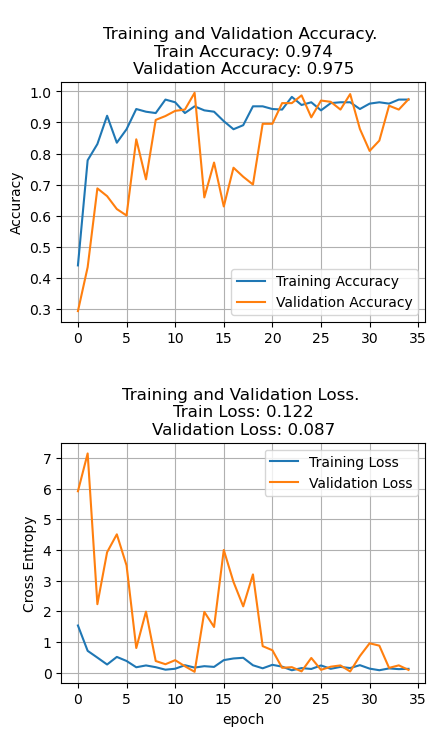

In [15]:
plot_history(history)

#### Approach 2: CNN

In [16]:
# Model Definition
INPUT_SHAPE = (224, 224, 3)

model = keras.Sequential()

model.add(Conv2D(32, (3, 3), input_shape = INPUT_SHAPE))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))


In [17]:
model.compile(loss='binary_crossentropy',
             optimizer='Adam',
             metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 activation (Activation)     (None, 222, 222, 32)      0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 activation_1 (Activation)   (None, 109, 109, 32)      0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                   

In [19]:
history = model.fit_generator(generator=train_generator,
                            steps_per_epoch=STEP_SIZE_TRAIN,
                            validation_data=test_generator,
                            validation_steps=STEP_SIZE_VALID,
                            epochs=5)

Epoch 1/5


C:\Users\KIIT\AppData\Local\Temp\ipykernel_20340\499041031.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_generator,


12/12 [==============================] - 5s 372ms/step - loss: 0.5321 - accuracy: 0.8617 - val_loss: 0.3670 - val_accuracy: 0.9000
Epoch 2/5
12/12 [==============================] - 4s 345ms/step - loss: 0.3704 - accuracy: 0.9000 - val_loss: 0.3461 - val_accuracy: 0.9000
Epoch 3/5
12/12 [==============================] - 4s 333ms/step - loss: 0.3502 - accuracy: 0.9000 - val_loss: 0.3304 - val_accuracy: 0.9000
Epoch 4/5
12/12 [==============================] - 4s 333ms/step - loss: 0.3477 - accuracy: 0.9000 - val_loss: 0.3422 - val_accuracy: 0.9000
Epoch 5/5
12/12 [==============================] - 4s 333ms/step - loss: 0.3472 - accuracy: 0.9000 - val_loss: 0.3383 - val_accuracy: 0.9000


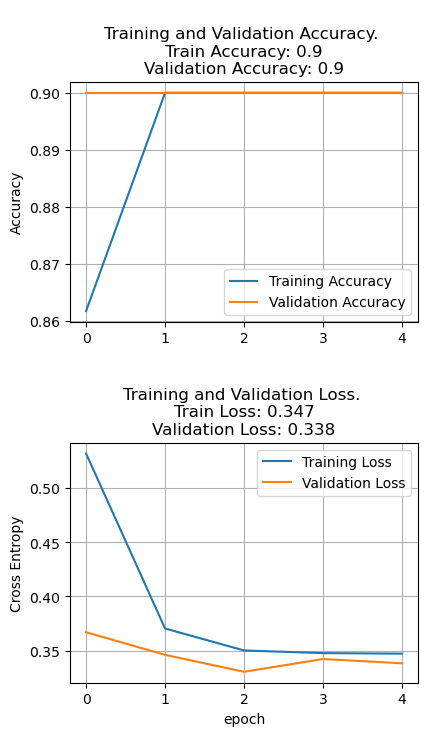

In [20]:
plot_history(history)

In [21]:
_, acc = model.evaluate(test_generator, verbose=0)
print("Accuracy: ", (acc*100.0), " %")

Accuracy:  89.99999761581421  %


#### Approach 3: VGG16

In [22]:
# Load the pre-trained VGG19 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

58889256/58889256 [==============================] - 20s 0us/step


In [23]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
output  = Dense(units=10, activation='softmax')(x)
model = Model(base_model.input, output)

In [24]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [25]:
model.compile(optimizer = tf.keras.optimizers.legacy.Adam(),
            loss = 'binary_crossentropy',
            metrics=['accuracy'])

In [26]:
history = model.fit_generator(generator=train_generator,
                            steps_per_epoch=STEP_SIZE_TRAIN,
                            validation_data=test_generator,
                            validation_steps=STEP_SIZE_VALID,
                            epochs=20)

Epoch 1/20


C:\Users\KIIT\AppData\Local\Temp\ipykernel_20340\2795265085.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_generator,


12/12 [==============================] - 46s 4s/step - loss: 0.4128 - accuracy: 0.1174 - val_loss: 0.3503 - val_accuracy: 0.0958
Epoch 2/20
12/12 [==============================] - 40s 3s/step - loss: 0.3456 - accuracy: 0.1087 - val_loss: 0.3298 - val_accuracy: 0.1000
Epoch 3/20
12/12 [==============================] - 39s 3s/step - loss: 0.3307 - accuracy: 0.1000 - val_loss: 0.3204 - val_accuracy: 0.2667
Epoch 4/20
12/12 [==============================] - 45s 4s/step - loss: 0.3310 - accuracy: 0.1348 - val_loss: 0.3171 - val_accuracy: 0.2958
Epoch 5/20
12/12 [==============================] - 44s 4s/step - loss: 0.3232 - accuracy: 0.1478 - val_loss: 0.3108 - val_accuracy: 0.3042
Epoch 6/20
12/12 [==============================] - 45s 4s/step - loss: 0.3222 - accuracy: 0.1783 - val_loss: 0.3045 - val_accuracy: 0.3958
Epoch 7/20
12/12 [==============================] - 45s 4s/step - loss: 0.3053 - accuracy: 0.2739 - val_loss: 0.2960 - val_accuracy: 0.4833
Epoch 8/20
12/12 [=============

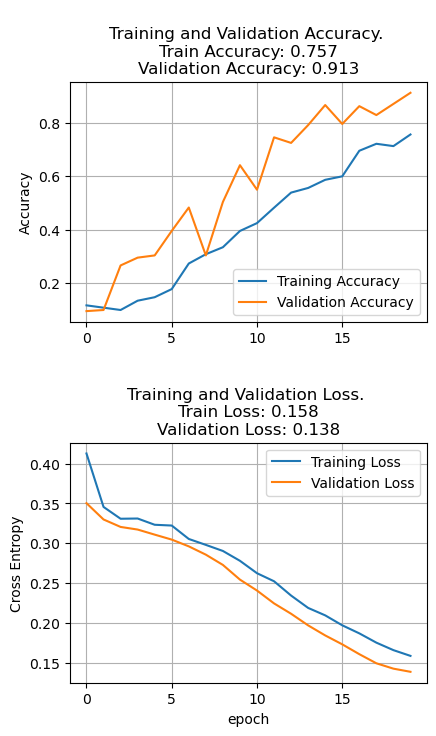

In [27]:
plot_history(history)

#### Approach 4: CNN with Attention mechanism

In [28]:
# importing modules and libraries

import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.layers import Input, InputLayer, Conv2D, MaxPooling2D, Flatten, ELU, Dense, BatchNormalization, Activation
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.optimizers import Nadam

##### Data Loading and Preprocessing

In [30]:
# updated datagen technique under keras (ImageDataGenerator is now image_dataset_from_directory under keras.utils)

dataset = keras.utils.image_dataset_from_directory(
    "C://Users//KIIT//OneDrive//Documents//Projects//color_detection_using_dl//training_dataset",
    image_size=(128, 128),
    batch_size=20
)

normalization_layer = keras.layers.Rescaling(1./255) # normalizing images from 0 to 255 to 0 to 1
normalized_dataset = dataset.map(lambda x, y: (normalization_layer(x), y)) # normalized images

images_list = [] # image container
labels_list = [] # label container

for images, labels in normalized_dataset: # taking out labels from folder name
    for image, label in zip(images, labels):
        image_array = image.numpy()
        images_list.append(image_array)
        labels_list.append(label.numpy())

image = np.asarray(images_list) # turning images to array

predictor_labels = [] # turning labels to probability distribution
for label in labels_list:
    one_hot_vector = np.zeros(10)
    one_hot_vector[label] = 1
    predictor_labels.append(one_hot_vector)

label = np.asarray(predictor_labels) # labels are now arrays of probability distribution

Found 250 files belonging to 10 classes.


##### Data Splitting

In [31]:
from sklearn.model_selection import train_test_split # splitting data for training

x_train, x_temp, y_train, y_temp = train_test_split(image,label,test_size=0.4,random_state=42)

x_test, x_val, y_test, y_val = train_test_split(x_temp,y_temp,test_size=0.5,random_state=42)

# train:val:test ratio : 60:20:20

# shapes of data

print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print("x_test:", x_test.shape)
print("y_test:", y_test.shape)
print("x_val:", x_val.shape)
print("y_val:", y_val.shape)

x_train: (150, 128, 128, 3)
y_train: (150, 10)
x_test: (50, 128, 128, 3)
y_test: (50, 10)
x_val: (50, 128, 128, 3)
y_val: (50, 10)


##### Displaying first 32 kernels

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 125, 125, 32)      1568      
                                                                 
Total params: 1568 (6.12 KB)
Trainable params: 1568 (6.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


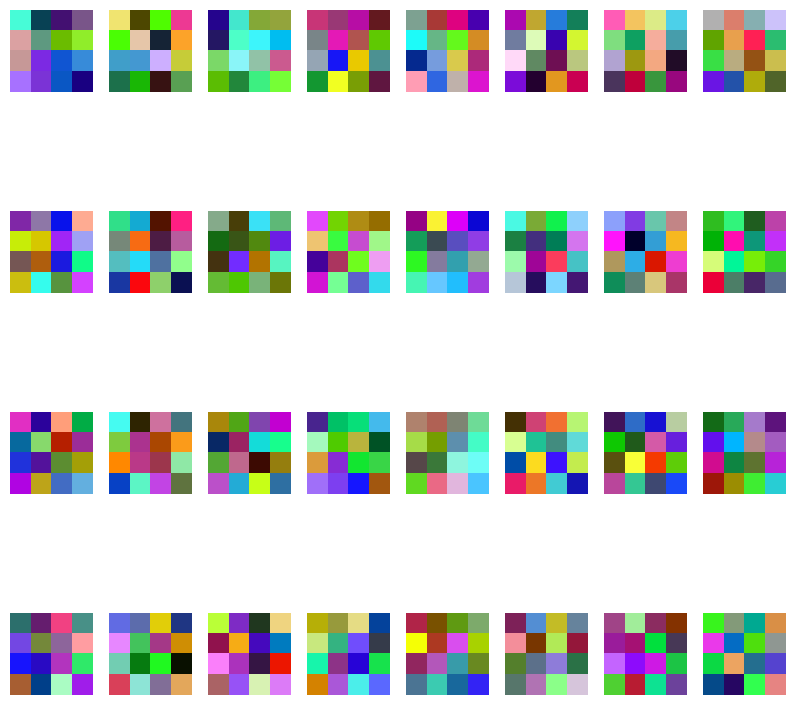

In [32]:
# model architecture to print first 32 kernels
input_layer = InputLayer(input_shape=(128, 128, 3))

conv_layer = Conv2D(32, 4, activation=ELU(), kernel_initializer='he_uniform')

conv_output = conv_layer(input_layer.output)

model = Sequential()
model.add(input_layer)
model.add(conv_layer)

model.build((None, 128, 128, 3)) # setting layers
model.summary() # model summary

weights = conv_layer.get_weights()[0] # getting weights

plt.figure(figsize=(10, 10)) # printing kernels
for i in range(32):
    plt.subplot(4, 8, i+1)
    kernel = weights[:, :, :, i]
    kernel = (kernel - kernel.min()) / (kernel.max() - kernel.min())
    plt.imshow(kernel)
    plt.axis('off')
plt.show()

##### Modelling

In [33]:
from keras.models import Model
from keras.layers import Multiply

def attention_mechanism(inputs): # Attention mechanism

    att_weights = Conv2D(1, kernel_size=(1, 1), activation='softmax', name='attention_weights')(inputs)

    attended_output = Multiply()([inputs, att_weights])
    
    return attended_output

# MOdel Checkpoint focused on val_accuracy to store best weights of max val_accuracy
model_checkpoint = ModelCheckpoint('model.keras', monitor='val_accuracy', save_best_only=True, verbose=1, mode='max')

input_dim = Input(shape=(128, 128, 3)) # input layer

# Convolutional layers with BatchNormalization and MaxPooling
layer_1 = Conv2D(32, 3, activation=ELU(), padding='same', kernel_initializer = 'he_uniform')(input_dim)
x = BatchNormalization()(layer_1)
x = MaxPooling2D(pool_size=2, padding='same')(x)

layer_2 = Conv2D(32, 3, activation=ELU(), padding='same', kernel_initializer = 'he_uniform')(x)
layer_2 = BatchNormalization()(layer_2)
x = MaxPooling2D(pool_size=2, padding='same')(layer_2)

layer_3 = Conv2D(32, 3, activation=ELU(), padding='same', kernel_initializer = 'he_uniform')(x)
layer_3 = BatchNormalization()(layer_3)
x = MaxPooling2D(pool_size=2, padding='same')(layer_3)

# Applying attention mechanism
x = attention_mechanism(x)

# Flatten layer to reshape data
x = Flatten()(x)

# Dense layers
layer_4 = Dense(64, activation=ELU())(x)

layer_5 = Dense(10, activation='softmax')(layer_4)

model = Model(inputs=input_dim, outputs=layer_5) # setting model layers
model.summary() # summary of model

model.compile(optimizer=Nadam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy']) # compiling the model

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv2d_4 (Conv2D)           (None, 128, 128, 32)         896       ['input_4[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 128, 128, 32)         128       ['conv2d_4[0][0]']            
 Normalization)                                                                                   
                                                                                                  
 max_pooling2d_6 (MaxPoolin  (None, 64, 64, 32)           0         ['batch_normalization[0]

In [34]:
# training model
history = model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=40, callbacks=[model_checkpoint],verbose=1)

Epoch 1/40
5/5 [==============================] - ETA: 0s - loss: 24.6898 - accuracy: 0.1400
Epoch 1: val_accuracy improved from -inf to 0.18000, saving model to model.keras
5/5 [==============================] - 4s 246ms/step - loss: 24.6898 - accuracy: 0.1400 - val_loss: 90.7970 - val_accuracy: 0.1800
Epoch 2/40
5/5 [==============================] - ETA: 0s - loss: 16.2821 - accuracy: 0.5533
Epoch 2: val_accuracy improved from 0.18000 to 0.32000, saving model to model.keras
5/5 [==============================] - 1s 196ms/step - loss: 16.2821 - accuracy: 0.5533 - val_loss: 108.3253 - val_accuracy: 0.3200
Epoch 3/40
5/5 [==============================] - ETA: 0s - loss: 13.5867 - accuracy: 0.6400
Epoch 3: val_accuracy did not improve from 0.32000
5/5 [==============================] - 1s 174ms/step - loss: 13.5867 - accuracy: 0.6400 - val_loss: 125.5688 - val_accuracy: 0.2800
Epoch 4/40
5/5 [==============================] - ETA: 0s - loss: 5.0336 - accuracy: 0.8267
Epoch 4: val_accur

5/5 [==============================] - 1s 163ms/step - loss: 0.5630 - accuracy: 0.9267 - val_loss: 4.5432 - val_accuracy: 0.8800
Epoch 30/40
5/5 [==============================] - ETA: 0s - loss: 1.0453 - accuracy: 0.8867
Epoch 30: val_accuracy did not improve from 0.92000
5/5 [==============================] - 1s 168ms/step - loss: 1.0453 - accuracy: 0.8867 - val_loss: 3.8255 - val_accuracy: 0.9000
Epoch 31/40
5/5 [==============================] - ETA: 0s - loss: 2.6458 - accuracy: 0.8667
Epoch 31: val_accuracy did not improve from 0.92000
5/5 [==============================] - 1s 163ms/step - loss: 2.6458 - accuracy: 0.8667 - val_loss: 13.2020 - val_accuracy: 0.7400
Epoch 32/40
5/5 [==============================] - ETA: 0s - loss: 3.3529 - accuracy: 0.8267
Epoch 32: val_accuracy did not improve from 0.92000
5/5 [==============================] - 1s 168ms/step - loss: 3.3529 - accuracy: 0.8267 - val_loss: 1.1384 - val_accuracy: 0.8600
Epoch 33/40
5/5 [==============================]

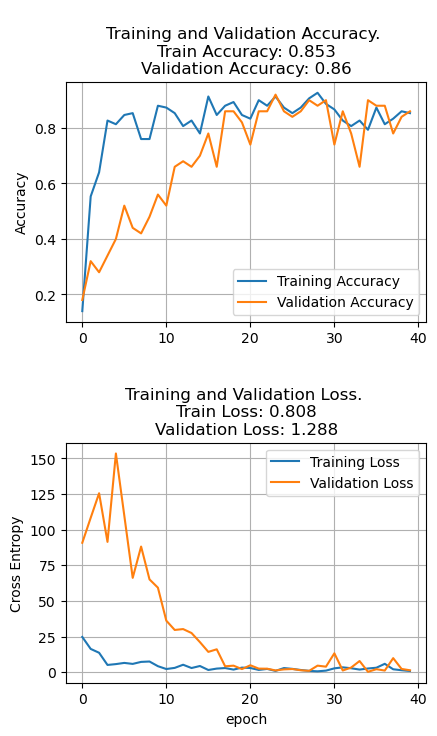

In [35]:
plot_history(history) # plotting graphs through function

##### Model Evaluation

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

model1 = keras.models.load_model('model.keras', custom_objects={"ELU": keras.layers.ELU}) # loading saved model

y_test_categorical = np.argmax(y_test, axis=1) # turning y_test probability distributions back to labels

y_pred_prob_val = model1.predict(x_test) # predicting

y_pred_val = np.argmax(y_pred_prob_val, axis=1) # turning y_pred probability distributions back to labels

# Accuracy
accuracy = accuracy_score(y_test_categorical, y_pred_val)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test_categorical, y_pred_val, average='macro')
print("Precision:", precision)

# Recall
recall = recall_score(y_test_categorical, y_pred_val, average='macro')
print("Recall:", recall)

# F1 Score
f1 = f1_score(y_test_categorical, y_pred_val, average='macro')
print("F1 Score:", f1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_categorical, y_pred_val)
print("Confusion Matrix:")
print(conf_matrix)

2/2 [==============================] - 0s 27ms/step
Accuracy: 0.84
Precision: 0.8461111111111113
Recall: 0.86
F1 Score: 0.8312445887445887
Confusion Matrix:
[[3 0 0 0 2 0 0 0 0 0]
 [0 7 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0]
 [0 0 0 6 0 0 0 0 0 0]
 [0 2 0 0 3 0 0 0 1 0]
 [0 0 0 0 0 6 0 0 0 0]
 [0 0 0 0 0 1 4 1 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 5 0]
 [0 0 0 0 0 1 0 0 0 5]]
